# Project Title : Seoul Bike Sharing Demand Prediction

# Problem Description
Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

# Data Description
The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.

# Features  Information:
Date : year-month-day

Rented Bike count - Count of bikes rented at each hour

Hour - Hour of he day

Temperature-Temperature in Celsius

Humidity - %

Windspeed - m/s

Visibility - 10m

Dew point temperature - Celsius

Solar radiation - MJ/m2

Rainfall - mm

Snowfall - cm

Seasons - Winter, Spring, Summer, Autumn

Holiday - Holiday/No holiday

Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)


# Data Prepration

Importing Libraries and dataset

In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import scipy.stats as stats
from sklearn.model_selection import train_test_split, GridSearchCV,  cross_val_score
from sklearn import preprocessing, linear_model
from sklearn.preprocessing import  LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler 
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score

import warnings
warnings.filterwarnings('ignore')

pd.pandas.set_option('display.max_columns',None)
%matplotlib inline


warnings.filterwarnings("ignore")
#imported different libraries where we will be working with.

In [2]:
df=pd.read_csv("SeoulBikeData.csv",encoding= 'unicode_escape')

In [3]:
# Checking shape pf dataframe
df.shape

(8760, 14)

In [4]:
#Check all the coloumns present in our dataset
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [5]:
# Renaming Columns
df.rename(columns={'Date': 'date', 'Rented Bike Count': 'bike_count', 'Hour': 'hour',
                   'Temperature(°C)': 'temp', 'Humidity(%)': 'humidity', 'Wind speed (m/s)': 'wind',
                   'Visibility (10m)': 'visibility', 'Dew point temperature(°C)': 'dew_temp',
                   'Solar Radiation (MJ/m2)': 'solar_rad', 'Rainfall(mm)': 'rain', 'Snowfall (cm)': 'snow',
                   'Seasons': 'season', 'Holiday': 'holiday', 'Functioning Day': 'functioning_day'}, inplace=True)

In [6]:
# Checking top 5 records in dataframe
df.head()

,date,bike_count,hour,temp,humidity,wind,visibility,dew_temp,solar_rad,rain,snow,season,holiday,functioning_day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [7]:
# Checking bottom 5 records in dataframe
df.tail()

,date,bike_count,hour,temp,humidity,wind,visibility,dew_temp,solar_rad,rain,snow,season,holiday,functioning_day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             8760 non-null   object 
 1   bike_count       8760 non-null   int64  
 2   hour             8760 non-null   int64  
 3   temp             8760 non-null   float64
 4   humidity         8760 non-null   int64  
 5   wind             8760 non-null   float64
 6   visibility       8760 non-null   int64  
 7   dew_temp         8760 non-null   float64
 8   solar_rad        8760 non-null   float64
 9   rain             8760 non-null   float64
 10  snow             8760 non-null   float64
 11  season           8760 non-null   object 
 12  holiday          8760 non-null   object 
 13  functioning_day  8760 non-null   object 
dtypes: float64(6), int64(4), object(4)
memory usage: 958.2+ KB


In [9]:
df.describe(percentiles=[.01,.25,.5,.75,.99]).transpose()

,count,mean,std,min,1%,25%,50%,75%,99%,max
bike_count,8760.0,704.602055,644.997468,0.0,0.000,191.00,504.50,1065.25,2526.23,3556.00
hour,8760.0,11.500000,6.922582,0.0,0.000,5.75,11.50,17.25,23.00,23.00
temp,8760.0,12.882922,11.944825,-17.8,-12.741,3.50,13.70,22.50,35.10,39.40
humidity,8760.0,58.226256,20.362413,0.0,17.000,42.00,57.00,74.00,97.00,98.00
wind,8760.0,1.724909,1.036300,0.0,0.100,0.90,1.50,2.30,4.70,7.40
visibility,8760.0,1436.825799,608.298712,27.0,173.000,940.00,1698.00,2000.00,2000.00,2000.00
dew_temp,8760.0,4.073813,13.060369,-30.6,-24.800,-4.70,5.10,14.80,24.70,27.20
solar_rad,8760.0,0.569111,0.868746,0.0,0.000,0.00,0.01,0.93,3.17,3.52
rain,8760.0,0.148687,1.128193,0.0,0.000,0.00,0.00,0.00,4.00,35.00
snow,8760.0,0.075068,0.436746,0.0,0.000,0.00,0.00,0.00,2.50,8.80


In [10]:
df.head(2).sort_values('date',ascending=True)
#Data is for the bikes rented between Dec 2017 and Dec 2018, one year data. 

#The data is from Dec'17 to Nov'18 for a year.

,date,bike_count,hour,temp,humidity,wind,visibility,dew_temp,solar_rad,rain,snow,season,holiday,functioning_day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [11]:
df.nunique().sort_values(ascending=True)

holiday               2
functioning_day       2
season                4
hour                 24
snow                 51
rain                 61
wind                 65
humidity             90
solar_rad           345
date                365
temp                546
dew_temp            556
visibility         1789
bike_count         2166
dtype: int64

# Insights from the dataset:

There are 14 features with 8760 rows of data.

There are 3 categorical columns, a date column (object type) and 10 numerical columns. 

Object Columns: 
‘Date’, ‘Seasons’ , 'Holiday' and ‘Functioning Day’ are of 𝑜𝑏𝑗𝑒𝑐𝑡 data type

Numerical Columns :  
‘Rented Bike Count’, ‘Hour’, ‘Humidity (%)' and ‘Visibility (10𝑚)' are of 𝑖𝑛𝑡64 numerical data type. 

‘Temperature (℃)’, ‘Wind Speed (𝑚/𝑠)’, ‘Dew Point Temperature (℃)’,‘Solar Radiation (𝑀𝐽/𝑚2)’,‘Rainfall (𝑚𝑚)' and ‘Snowfall(𝑐𝑚) are of 𝑓𝑙𝑜𝑎𝑡64 numerical data type.

Unique count for categorcial columns : 
Seasons- 4
Holiday- 2
Functioning Day- 2

# Checking for any Null Values and Duplicates

In [12]:
# Missing data counts
df.isnull().sum()

date               0
bike_count         0
hour               0
temp               0
humidity           0
wind               0
visibility         0
dew_temp           0
solar_rad          0
rain               0
snow               0
season             0
holiday            0
functioning_day    0
dtype: int64

In [13]:
# Check for duplicated entries.
print("Duplicate entry in data:",len(df[df.duplicated()])) 

Duplicate entry in data: 0


The ranges of values in the numerical columns seem reasonable too, so we may not have to do much data cleaning. The "Wind speed","Dew point temperature(°C)", "Solar Radiation", "Rainfall" and "Snowfall" column seems to be significantly skewed however, as the median (50 percentile) is much lower than the maximum value.

Data Filtering Rented Bike days Filtering

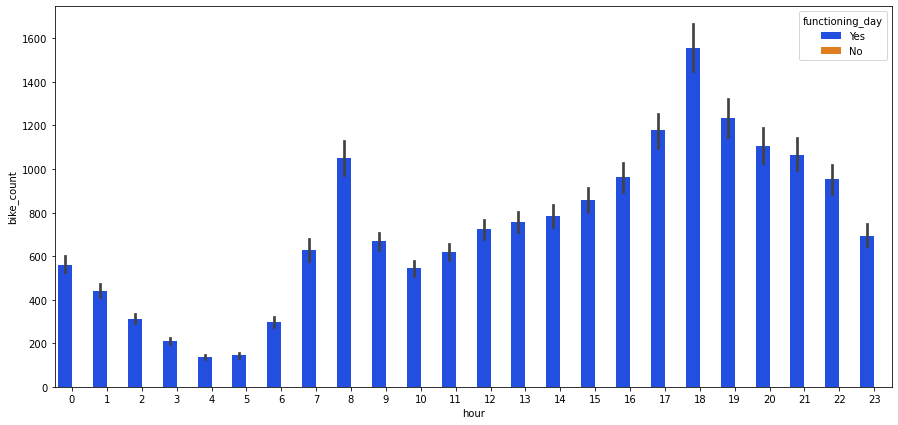

In [14]:
#for chech functioning and non functioning day ,plot (Hour Vs Rented Bike Count Graph)
def barplots(x,y,hue):
    plt.figure(figsize=(15,7))
    sns.set_palette('bright')
    sns.barplot(x=x,y=y,hue=hue,data=df);
barplots('hour','bike_count','functioning_day')

In [15]:
# Grouping by functioning day and calculating the total Rented Bike Count
df.groupby('functioning_day').sum()['bike_count'].sort_values(ascending = False).reset_index()

,functioning_day,bike_count
0,Yes,6172314
1,No,0


As per diagnosis data found that rental bike only given on Functioning Day. So we can remove data for Non-Functioning Days and remove Functioning Day Column too.

In [16]:
#Removing data of non functional days (non rented days)
df=df.drop(df[df['functioning_day'] == 'No'].index) 

In [17]:
#Due to not unsefull in Functioning Day Column ,remove Functioning Day Column
df=df.drop(['functioning_day'], axis = 1)

In [18]:
#Checking DataFrame Shape After Removing Non Functional Day Rows And Functional Day Column
print("Filtered Dataframe with only rented bike days :",df.shape,"\n") 

Filtered Dataframe with only rented bike days : (8465, 13) 



In [19]:
df1=df.copy()

In [20]:
df1.shape

(8465, 13)

# Cleaning and manipulating the data

In [21]:
# Extracting new features from date and hour column
df1['date'] = pd.to_datetime(df1['date']) 
df1['weekend'] = df1['date'].apply(lambda x : 1 if (x.day_name()=='Saturday' or x.day_name()=='Sunday') else 0 )
df1['timeshift'] = df1['hour'].apply(lambda x: 'Night' if 0<=x<=6 else ('Day' if 7<=x<=16 else 'Evening'))

In [22]:
df1['day']=df1['date'].dt.day
df1['month']=df1['date'].dt.month

In [23]:
# Dropping the Date column
df1.drop(columns=['date'], inplace = True)

# Removing Outliers

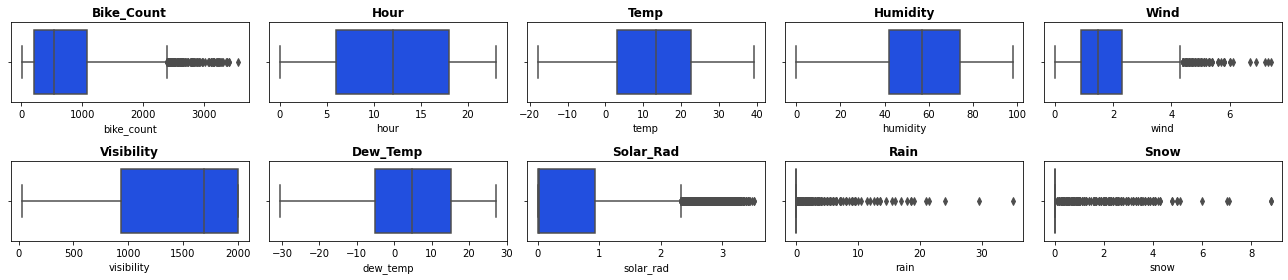

In [24]:
# Checking for outliers
plt.figure(figsize=(18,4))
for n,column in enumerate(df.describe().columns):
  plt.subplot(2, 5, n+1)
  sns.boxplot(df[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

In [25]:

# Removing outliers by Using IQR method:
q1, q3, median = df1.bike_count.quantile([0.25,0.75,0.5])
lower_limit = q1 - 1.5*(q3-q1)
upper_limit = q3 + 1.5*(q3-q1)
df1['bike_count'] = np.where(df1['bike_count'] > upper_limit, median,
                    np.where(df1['bike_count'] < lower_limit,median,
                    df1['bike_count']))

# Removing outliers by Capping:
for col in ['wind','solar_rad','rain','snow']:
  upper_limit = df1[col].quantile(0.99)
  df1[col] = np.where(df1[col] > upper_limit, upper_limit, df1[col])

ValueError: num must be 1 <= num <= 10, not 11

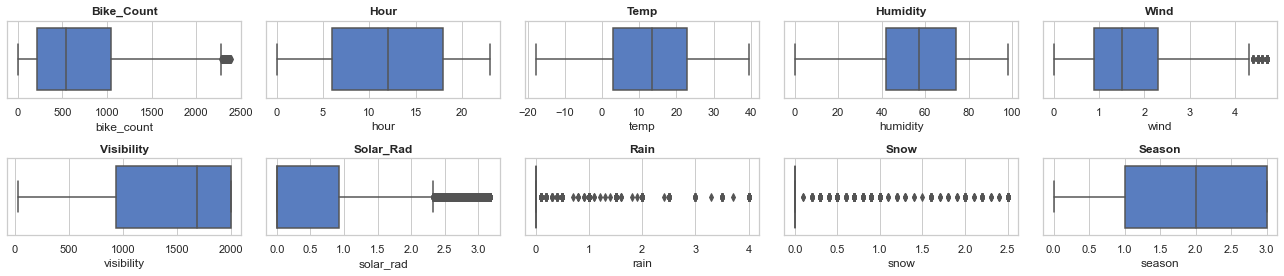

In [54]:
# Checking for outliers
plt.figure(figsize=(18,4))
for n,column in enumerate(df1.describe().columns):
  plt.subplot(2, 5, n+1)
  sns.boxplot(df1[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

In [26]:
df1.describe(percentiles=[.01,.25,.5,.75,.99]).transpose()

,count,mean,std,min,1%,25%,50%,75%,99%,max
bike_count,8465.0,690.201772,582.680316,2.0,17.000,214.0,542.00,1041.00,2274.720,2387.00
hour,8465.0,11.507029,6.920899,0.0,0.000,6.0,12.00,18.00,23.000,23.00
temp,8465.0,12.771057,12.104375,-17.8,-12.936,3.0,13.50,22.70,35.200,39.40
humidity,8465.0,58.147194,20.484839,0.0,17.000,42.0,57.00,74.00,97.000,98.00
wind,8465.0,1.720992,1.017240,0.0,0.100,0.9,1.50,2.30,4.700,4.70
visibility,8465.0,1433.873479,609.051229,27.0,172.640,935.0,1690.00,2000.00,2000.000,2000.00
dew_temp,8465.0,3.944997,13.242399,-30.6,-24.936,-5.1,4.70,15.20,24.736,27.20
solar_rad,8465.0,0.566737,0.864732,0.0,0.000,0.0,0.01,0.93,3.170,3.17
rain,8465.0,0.098145,0.514504,0.0,0.000,0.0,0.00,0.00,4.000,4.00
snow,8465.0,0.066533,0.340734,0.0,0.000,0.0,0.00,0.00,2.500,2.50


# Exploratory Analysis and Visualization
Let's explore the data by visualizing the distribution of values in some columns of the dataset, and the relationships between "Rented Bike count" and other columns.

We'll use libraries Matplotlib, Seaborn for visualization.

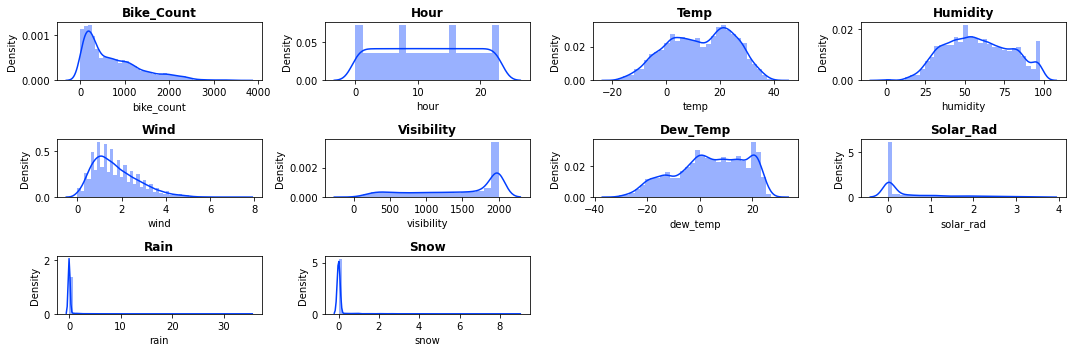

In [27]:
# Visualizing the distributions.
plt.figure(figsize=(15,5))
for n,column in enumerate(df.describe().columns):
  plt.subplot(3, 4, n+1)
  sns.distplot(df[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

In [28]:
# Lets take care of the categorical features
categorical_features = [i for i in df1.columns if i not in df1.describe().columns]
categorical_features

['season', 'holiday', 'timeshift']

In [29]:
# Checking unique value with their counts in categorical features
for col in categorical_features:
  print(df1[col].value_counts(),'\n')

Summer    2208
Winter    2160
Spring    2160
Autumn    1937
Name: season, dtype: int64 

No Holiday    8057
Holiday        408
Name: holiday, dtype: int64 

Day        3530
Evening    2471
Night      2464
Name: timeshift, dtype: int64 



In [30]:
# GROUPING BY SEASONS AND CALCULATING THE TOTAL RENTED BIKE COUNT
pd.options.display.float_format = '{:,.1f}'.format
df1.groupby('season').sum()['bike_count'].sort_values(ascending = False).reset_index()

,season,bike_count
0,Summer,"2,098,149.0"
1,Autumn,"1,713,936.0"
2,Spring,"1,543,304.0"
3,Winter,"487,169.0"


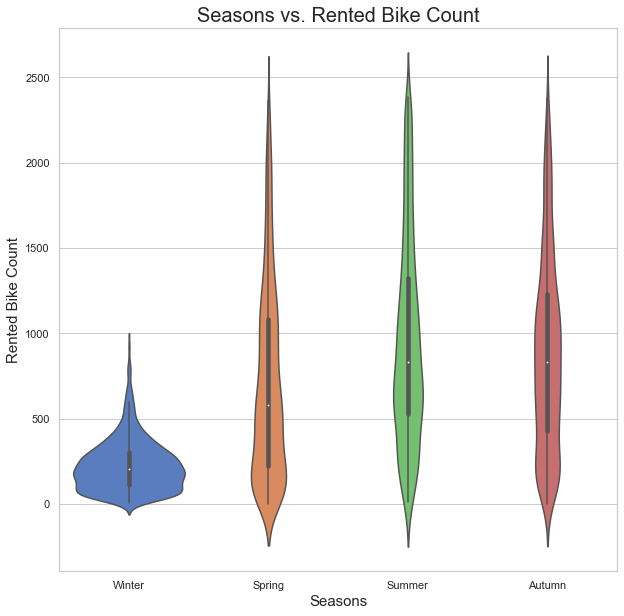

In [31]:
plt.figure(figsize=(10,10))
sns.set(style="whitegrid", palette="muted", color_codes=True)
sns.violinplot(x = 'season', y = 'bike_count', data=df1)
plt.title('Seasons vs. Rented Bike Count', fontsize=20)
plt.xlabel('Seasons', fontsize=15)
plt.ylabel('Rented Bike Count', fontsize=15)
plt.show()

In [105]:
# GROUPING BY HOLIDAY AND CALCULATING THE TOTAL RENTED BIKE COUNT
df1.groupby('holiday').sum()['bike_count'].sort_values(ascending = False).reset_index()

,holiday,bike_count
0,0,"5,628,521.0"
1,1,"214,037.0"


In [106]:
# GROUPING BY HOLIDAY AND CALCULATING THE TOTAL RENTED BIKE COUNT
df1.groupby('holiday').sum()

,bike_count,hour,temp,humidity,wind,visibility,solar_rad,rain,snow,season,weekend,timeshift,day,month
holiday,,,,,,,,,,,,,,
0,"5,628,521.0",92715,"104,168.7",470267,"13,807.8",11528195,"4,568.9",805.0,541.2,12312,2321,8064,126818,52422
1,"214,037.0",4692,"3,938.3",21949,760.4,609544,228.6,25.8,22.0,744,120,408,6816,2544


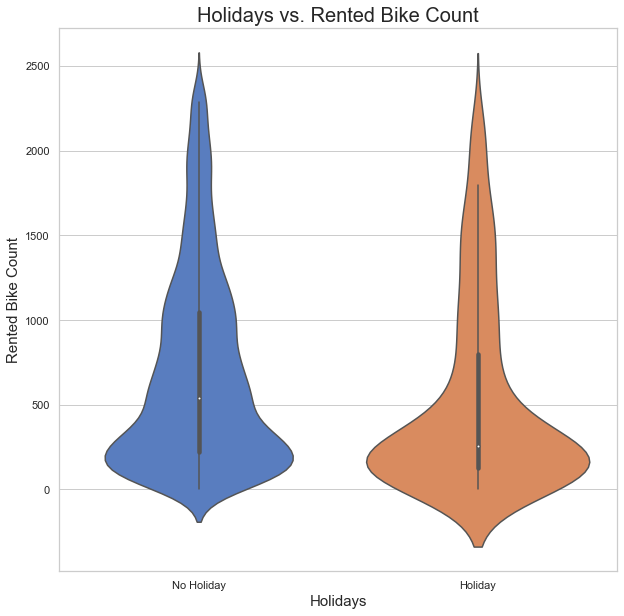

In [33]:
plt.figure(figsize=(10,10))
sns.set(style="whitegrid", palette="muted", color_codes=True)
sns.violinplot(x = 'holiday', y = 'bike_count', data=df1)
plt.title('Holidays vs. Rented Bike Count', fontsize=20)
plt.xlabel('Holidays', fontsize=15)
plt.ylabel('Rented Bike Count', fontsize=15)
plt.show()

In [34]:
# GROUPING BY HOLIDAY AND CALCULATING THE TOTAL RENTED BIKE COUNT
df1.groupby('timeshift').sum()['bike_count'].sort_values(ascending = False).reset_index()

,timeshift,bike_count
0,Day,"2,670,448.0"
1,Evening,"2,430,487.0"
2,Night,"741,623.0"


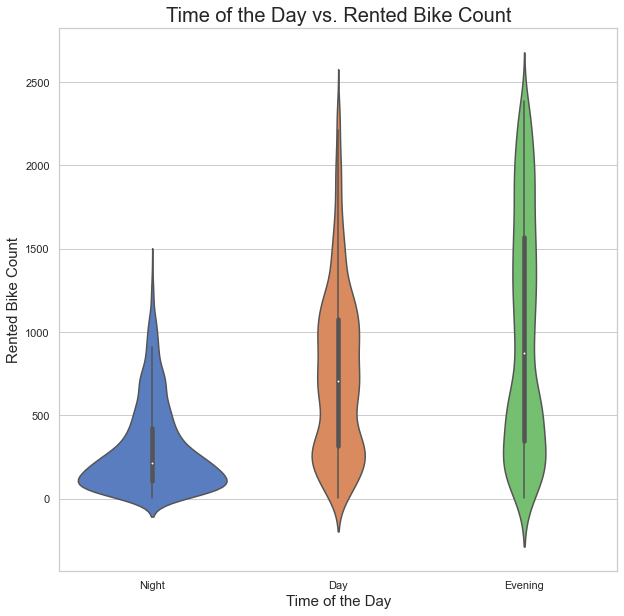

In [35]:
plt.figure(figsize=(10,10))
sns.set(style="whitegrid", palette="muted", color_codes=True)
sns.violinplot(x = 'timeshift', y = 'bike_count', data=df1)
plt.title('Time of the Day vs. Rented Bike Count', fontsize=20)
plt.xlabel('Time of the Day', fontsize=15)
plt.ylabel('Rented Bike Count', fontsize=15)
plt.show()

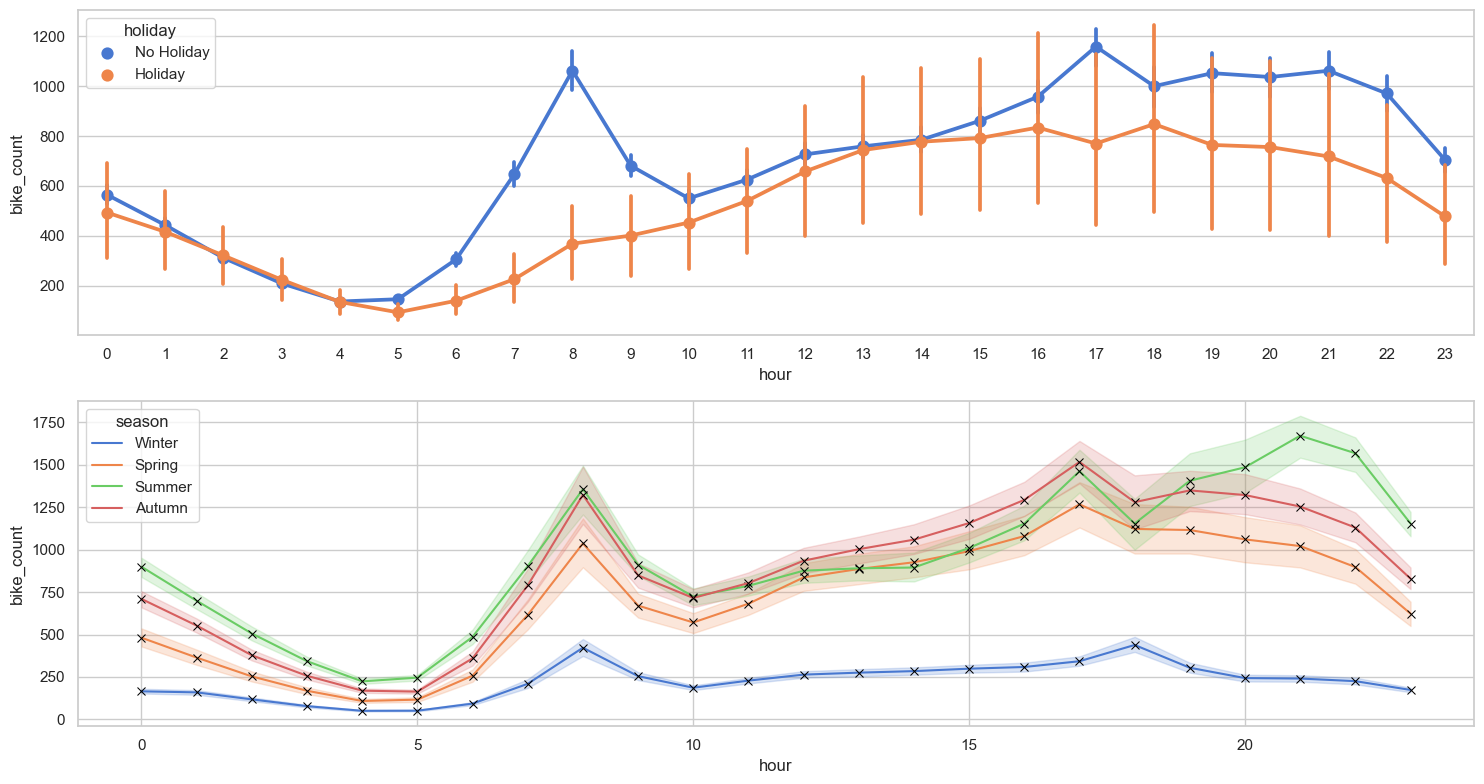

In [36]:
fig, axs = plt.subplots(nrows=2,ncols=1,figsize=(15,8), dpi=100)
sns.pointplot(data=df1, x="hour", y="bike_count", ax=axs[0], 
              hue="holiday")
sns.lineplot(data=df1, x="hour", y="bike_count", ax=axs[1], 
              hue="season", marker="x",markeredgecolor="black")
plt.tight_layout()

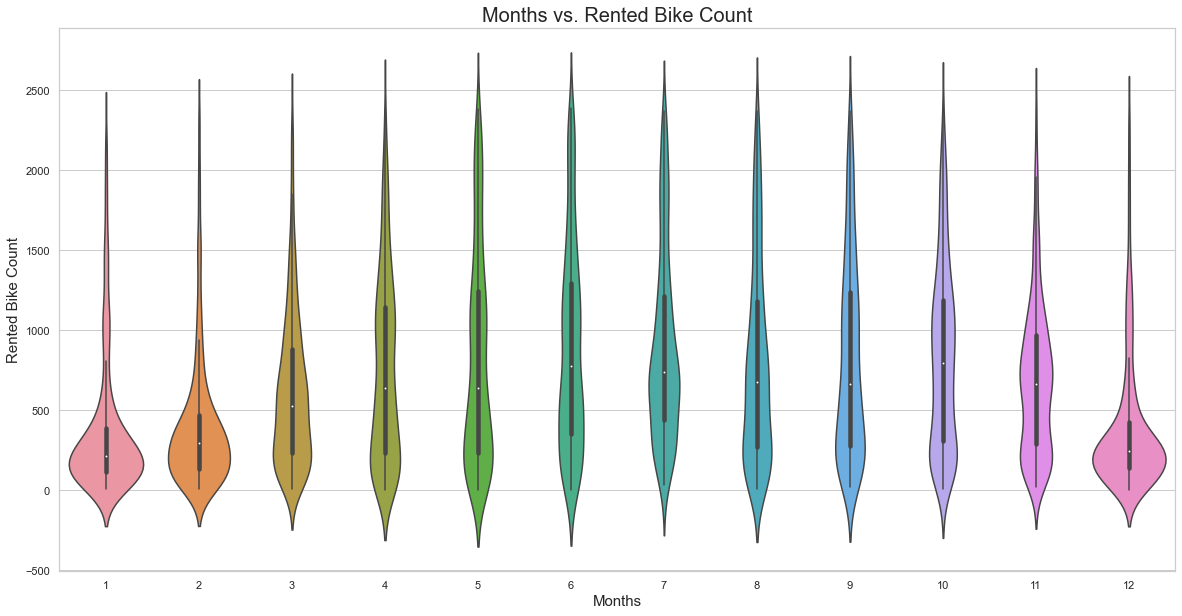

In [177]:
plt.figure(figsize=(20,10))
sns.set(style="whitegrid", palette="muted", color_codes=True)
sns.violinplot(x = 'month', y = 'bike_count', data=df1)
plt.title('Months vs. Rented Bike Count', fontsize=20)
plt.xlabel('Months', fontsize=15)
plt.ylabel('Rented Bike Count', fontsize=15)
plt.show()

# Removing Multicollinearity

In [37]:
# Defining a function to calculate Variance Inflation factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif.sort_values(by='VIF',ascending=False).reset_index(drop=True))

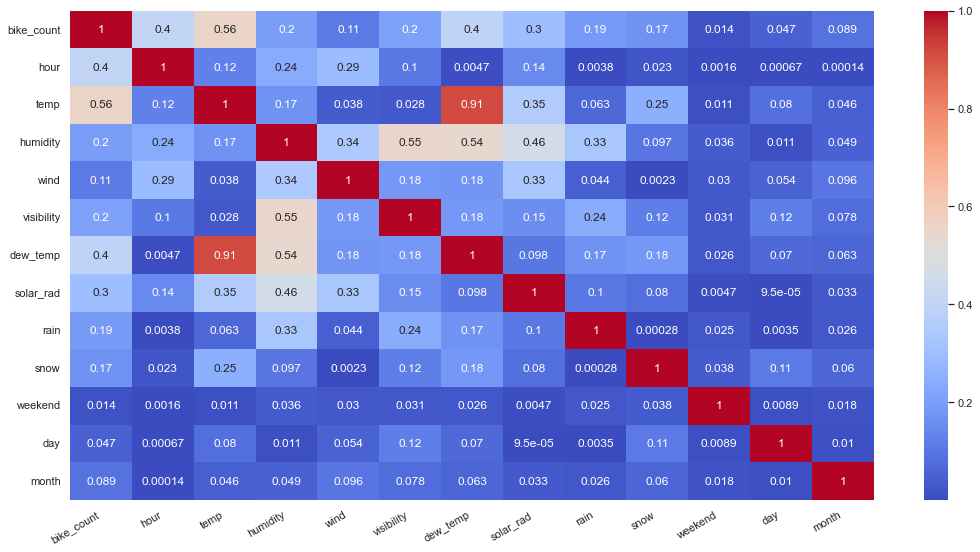

In [38]:
# Checking corelations
plt.figure(figsize=(18,9))
plot=sns.heatmap(abs(df1.corr()), annot=True, cmap='coolwarm')
plot.set_xticklabels(plot.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

In [39]:
# View correlation matrix
df1.corr()

,bike_count,hour,temp,humidity,wind,visibility,dew_temp,solar_rad,rain,snow,weekend,day,month
bike_count,1.0,0.4,0.6,-0.2,0.1,0.2,0.4,0.3,-0.2,-0.2,-0.0,0.0,0.1
hour,0.4,1.0,0.1,-0.2,0.3,0.1,0.0,0.1,0.0,-0.0,0.0,-0.0,-0.0
temp,0.6,0.1,1.0,0.2,-0.0,0.0,0.9,0.4,0.1,-0.2,-0.0,0.1,0.0
humidity,-0.2,-0.2,0.2,1.0,-0.3,-0.5,0.5,-0.5,0.3,0.1,-0.0,0.0,0.0
wind,0.1,0.3,-0.0,-0.3,1.0,0.2,-0.2,0.3,-0.0,0.0,-0.0,-0.1,-0.1
visibility,0.2,0.1,0.0,-0.5,0.2,1.0,-0.2,0.2,-0.2,-0.1,0.0,-0.1,0.1
dew_temp,0.4,0.0,0.9,0.5,-0.2,-0.2,1.0,0.1,0.2,-0.2,-0.0,0.1,0.1
solar_rad,0.3,0.1,0.4,-0.5,0.3,0.2,0.1,1.0,-0.1,-0.1,0.0,-0.0,-0.0
rain,-0.2,0.0,0.1,0.3,-0.0,-0.2,0.2,-0.1,1.0,0.0,-0.0,0.0,-0.0
snow,-0.2,-0.0,-0.2,0.1,0.0,-0.1,-0.2,-0.1,0.0,1.0,-0.0,0.1,0.1


In [40]:
# Return "True" for positive or negative correlations that are bigger than 0.75.
abs(df1.corr())>0.75

,bike_count,hour,temp,humidity,wind,visibility,dew_temp,solar_rad,rain,snow,weekend,day,month
bike_count,True,False,False,False,False,False,False,False,False,False,False,False,False
hour,False,True,False,False,False,False,False,False,False,False,False,False,False
temp,False,False,True,False,False,False,True,False,False,False,False,False,False
humidity,False,False,False,True,False,False,False,False,False,False,False,False,False
wind,False,False,False,False,True,False,False,False,False,False,False,False,False
visibility,False,False,False,False,False,True,False,False,False,False,False,False,False
dew_temp,False,False,True,False,False,False,True,False,False,False,False,False,False
solar_rad,False,False,False,False,False,False,False,True,False,False,False,False,False
rain,False,False,False,False,False,False,False,False,True,False,False,False,False
snow,False,False,False,False,False,False,False,False,False,True,False,False,False


Since Temperature and Dew point temperature are highly correlated (0.91), so to avoid multicollinearity issue, we will drop Dew point temperature feature.

In [41]:
#Drop Dew point temperature(°C) from dataset df1
df1.drop(columns=['dew_temp'],inplace=True)  

In [42]:
df1

,bike_count,hour,temp,humidity,wind,visibility,solar_rad,rain,snow,season,holiday,weekend,timeshift,day,month
0,254.0,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday,0,Night,12,1
1,204.0,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday,0,Night,12,1
2,173.0,2,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,No Holiday,0,Night,12,1
3,107.0,3,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,No Holiday,0,Night,12,1
4,78.0,4,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,No Holiday,0,Night,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,"1,003.0",19,4.2,34,2.6,1894,0.0,0.0,0.0,Autumn,No Holiday,0,Evening,30,11
8756,764.0,20,3.4,37,2.3,2000,0.0,0.0,0.0,Autumn,No Holiday,0,Evening,30,11
8757,694.0,21,2.6,39,0.3,1968,0.0,0.0,0.0,Autumn,No Holiday,0,Evening,30,11
8758,712.0,22,2.1,41,1.0,1859,0.0,0.0,0.0,Autumn,No Holiday,0,Evening,30,11


# Dealing with Categorical Values

In [51]:
# Defining a label encoder based on above data
encoder = {'holiday':{'Holiday':1, 'No Holiday':0},'season':{'Autumn':0 , 'Spring':1,'Summer':2, 'Winter':3},
          'timeshift': {'Night':0, 'Day':1, 'Evening':2}}

0 : Autumn , 1 : Spring , 2 : Summer , 3 : Winter

In [52]:
# Label Encoding
df1 = df1.replace(encoder)

In [53]:
df1.head(1)

,bike_count,hour,temp,humidity,wind,visibility,solar_rad,rain,snow,season,holiday,weekend,timeshift,day,month
0,254.0,0,-5.2,37,2.2,2000,0.0,0.0,0.0,3,0,0,0,12,1


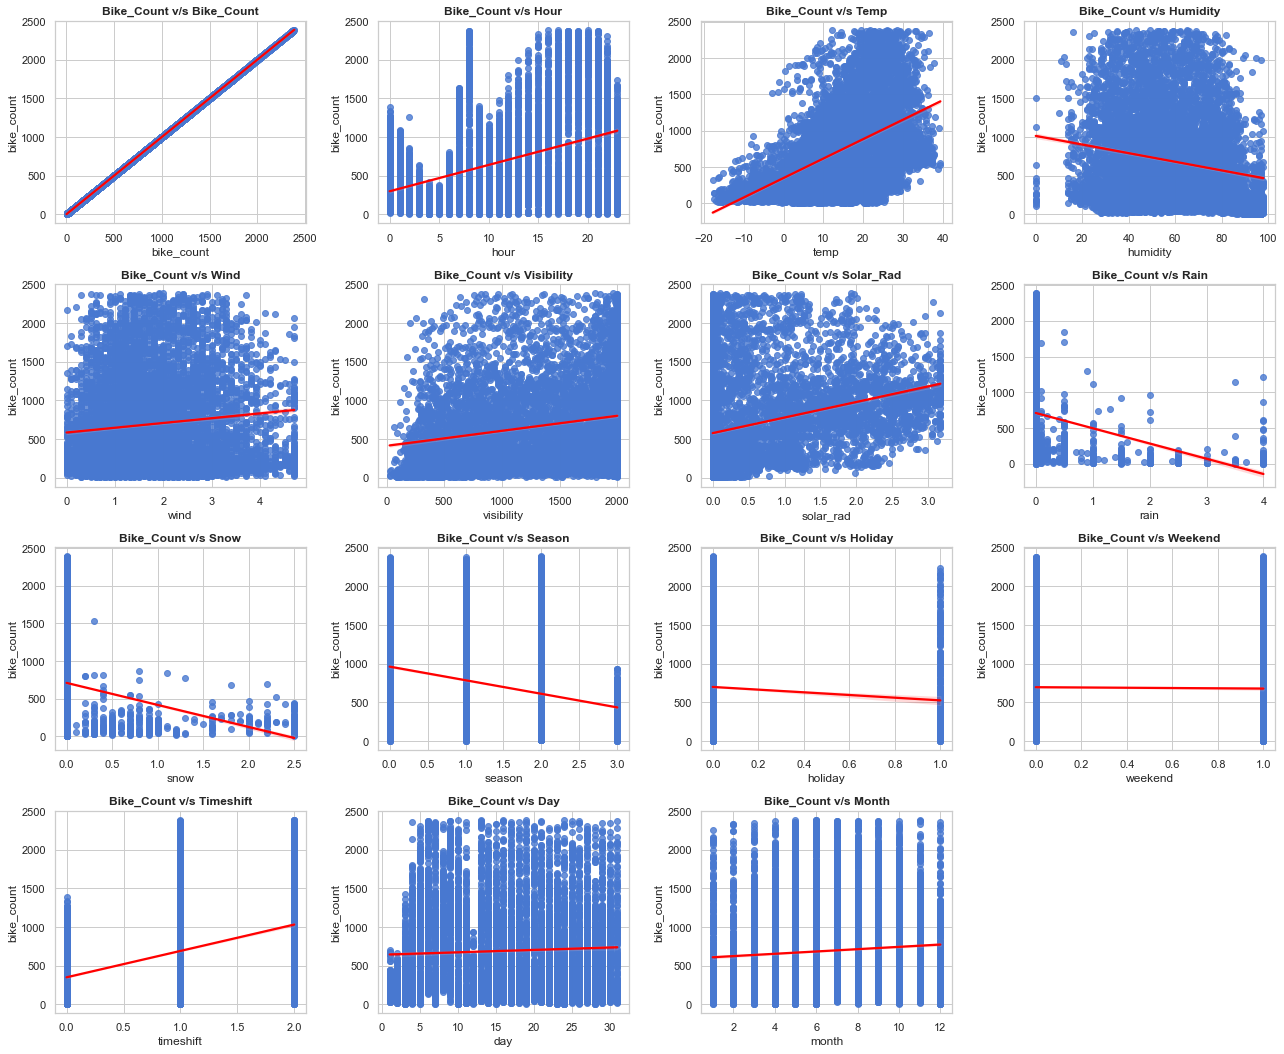

In [55]:
# Checking Linearity
plt.figure(figsize=(18,18))
for n,column in enumerate(df1):
  plt.subplot(5, 4, n+1)
  sns.regplot(data = df1, x = column, y ='bike_count',line_kws={"color": "red"})
  plt.title(f'Bike_Count v/s {column.title()}',weight='bold')
  plt.tight_layout()

In [46]:
#checking skewness of the dependend variable
print(f'Skewness of original data : {df1.bike_count.skew()}')
print(f'Skewness after log transformation : {np.log(df1.bike_count).skew()}')
print(f'Skewness after transformation : {np.sqrt(df1.bike_count).skew()}')

Skewness of original data : 0.9683253836166369
Skewness after log transformation : -0.8570855259607234
Skewness after transformation : 0.26609206416312225


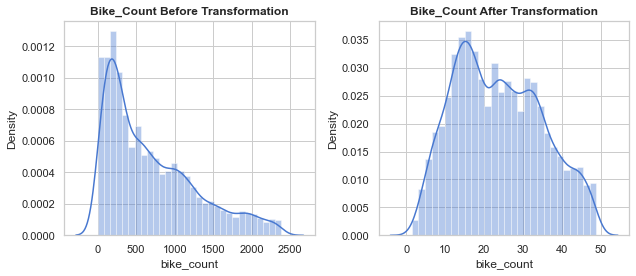

In [47]:
#Since Sqrt Transformation gives skewness between -0.5 and 0.5 indicates that the distribution is fairly symmetrical we will use it
plt.figure(figsize=(9,4))
plot = plt.subplot(1,2,1)
sns.distplot(df1['bike_count']).set_title('Bike_Count Before Transformation',weight='bold')
plot = plt.subplot(1,2,2)
sns.distplot(np.sqrt(df1['bike_count'])).set_title('Bike_Count After Transformation',weight='bold')
plt.tight_layout()

In [50]:
df1.head(1)

,bike_count,hour,temp,humidity,wind,visibility,solar_rad,rain,snow,season,holiday,weekend,timeshift,day,month
0,254.0,0,-5.2,37,2.2,2000,0.0,0.0,0.0,3,0,0,Night,12,1


# Model Building

# Base Model 1

In [56]:
X = df1.drop('bike_count', axis=1)
y = df1['bike_count']

X_int = sm.add_constant(X)
model = sm.OLS(y,X_int).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             bike_count   R-squared:                       0.578
Model:                            OLS   Adj. R-squared:                  0.578
Method:                 Least Squares   F-statistic:                     827.5
Date:                Sat, 05 Nov 2022   Prob (F-statistic):               0.00
Time:                        00:13:49   Log-Likelihood:                -62259.
No. Observations:                8465   AIC:                         1.245e+05
Df Residuals:                    8450   BIC:                         1.247e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        623.3232     34.806     17.909      0.000     555.095     691.551
hour         -24.3727      1.754    -13.895      0.000     -27.811     -20.934
temp          24.3842      0.453     53.770      0.000      23.495      25.273
humidity      -5.2903      0.330    -16.035      0.000      -5.937      -4.644
wind          -0.0638      4.615     -0.014      0.989      -9.110       8.983
visibility     0.0169      0.009      1.950      0.051   -8.43e-05       0.034
solar_rad     -6.4719      6.698     -0.966      0.334     -19.602       6.658
rain        -188.3969      8.576    -21.967      0.000    -205.209    -171.585
snow          19.0569     13.029      1.463      0.144      -6.483      44.597
season       -98.5641      4.131    -23.860      0.000    -106.662     -90.466
holiday      -95.1938     19.299     -4.933      0.000    -133.024     -57.363
weekend      -24.4305      9.111     -2.681      0.007     -42.291      -6.570
timeshift    478.5946     15.738     30.410      0.000     447.745     509.445
day           -0.1834      0.482     -0.381      0.703      -1.128       0.761
month          4.2980      1.240      3.467      0.001       1.868       6.728
==============================================================================
Omnibus:                      605.066   Durbin-Watson:                   0.869
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              914.840
Skew:                           0.581   Prob(JB):                    2.21e-199
Kurtosis:                       4.115   Cond. No.                     1.33e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.33e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

There are 2 features where p value > 0.5, which are wind and day. Removing these in the next model. 

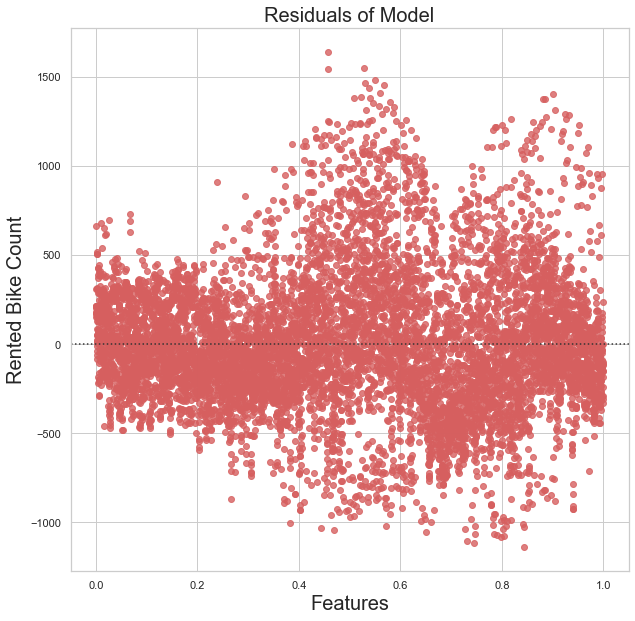

In [57]:
 # Check residuals using sns.residplot
y_hat = model.predict()
residuals = df1['bike_count'] - y_hat
x_vals = np.linspace(0, 1, len(residuals))

plt.figure(figsize=(10,10))
sns.residplot(x_vals, residuals, data = df1, color='r')
plt.title('Residuals of Model', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.ylabel('Rented Bike Count', fontsize=20)
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12)
plt.show()

# Model 2 - Data normalisation 

In [58]:
df2=df1.copy()

In [59]:
df2['bike_count']=np.sqrt(df2['bike_count'])

In [163]:
df2.head(2)

,bike_count,hour,temp,humidity,wind,visibility,solar_rad,rain,snow,season,holiday,weekend,timeshift,day,month
0,15.9,0,-5.2,37,2.2,2000,0.0,0.0,0.0,3,0,0,0,12,1
1,14.3,1,-5.5,38,0.8,2000,0.0,0.0,0.0,3,0,0,0,12,1


In [60]:
#conduct min-max scaling
scaler = preprocessing.MinMaxScaler()
columns = df2.columns
d = scaler.fit_transform(df2)
df3 = pd.DataFrame(d, columns=columns)
df3.head()

,bike_count,hour,temp,humidity,wind,visibility,solar_rad,rain,snow,season,holiday,weekend,timeshift,day,month
0,0.3,0.0,0.2,0.4,0.5,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.4,0.0
1,0.3,0.0,0.2,0.4,0.2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.4,0.0
2,0.2,0.1,0.2,0.4,0.2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.4,0.0
3,0.2,0.1,0.2,0.4,0.2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.4,0.0
4,0.2,0.2,0.2,0.4,0.5,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.4,0.0


In [61]:
def plotvariable(df,variable):
  plt.figure(figsize=(10,5))
  plt.subplot(1,2,1)   #means 1 row, 2 Columns and 1st plot
  df[variable].hist(bins=30)

  ##QQ plot
  plt.subplot(1,2,2)
  stats.probplot(df[variable], dist='norm',plot=plt)
  plt.show()

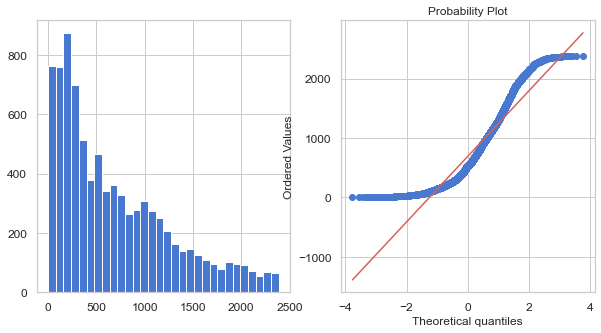

In [84]:
plotvariable(df1,'bike_count')

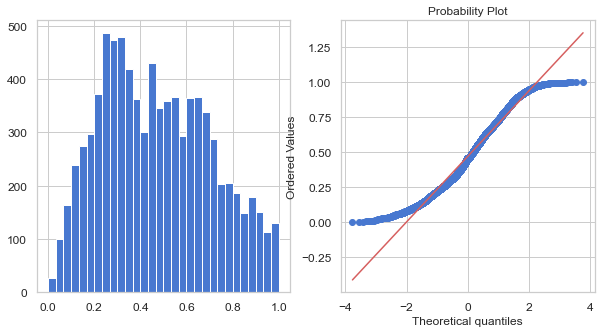

In [63]:
plotvariable(df3,'bike_count')

In [64]:
# removing wind and day as p value was higher in the last model. 
df3.drop(columns=['wind','day'],inplace=True)  

In [65]:
X3 = df3.drop('bike_count', axis=1)
y3 = df3['bike_count']

X_int = sm.add_constant(X3)
model = sm.OLS(y3,X_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             bike_count   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     1400.
Date:                Sat, 05 Nov 2022   Prob (F-statistic):               0.00
Time:                        00:13:49   Log-Likelihood:                 4809.3
No. Observations:                8465   AIC:                            -9593.
Df Residuals:                    8452   BIC:                            -9501.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2793      0.011     25.106      0.000       0.257       0.301
hour          -0.2640      0.015    -18.111      0.000      -0.293      -0.235
temp           0.5828      0.009     63.113      0.000       0.565       0.601
humidity      -0.2224      0.012    -19.203      0.000      -0.245      -0.200
visibility     0.0068      0.006      1.123      0.261      -0.005       0.019
solar_rad      0.0231      0.007      3.117      0.002       0.009       0.038
rain          -0.4291      0.012    -34.560      0.000      -0.453      -0.405
snow          -0.0087      0.012     -0.742      0.458      -0.032       0.014
season        -0.1313      0.004    -29.380      0.000      -0.140      -0.123
holiday       -0.0555      0.007     -7.940      0.000      -0.069      -0.042
weekend       -0.0122      0.003     -3.714      0.000      -0.019      -0.006
timeshift      0.4115      0.011     36.092      0.000       0.389       0.434
month          0.0271      0.005      5.492      0.000       0.017       0.037
==============================================================================
Omnibus:                       80.651   Durbin-Watson:                   0.825
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              132.702
Skew:                          -0.022   Prob(JB):                     1.53e-29
Kurtosis:                       3.612   Cond. No.                         22.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

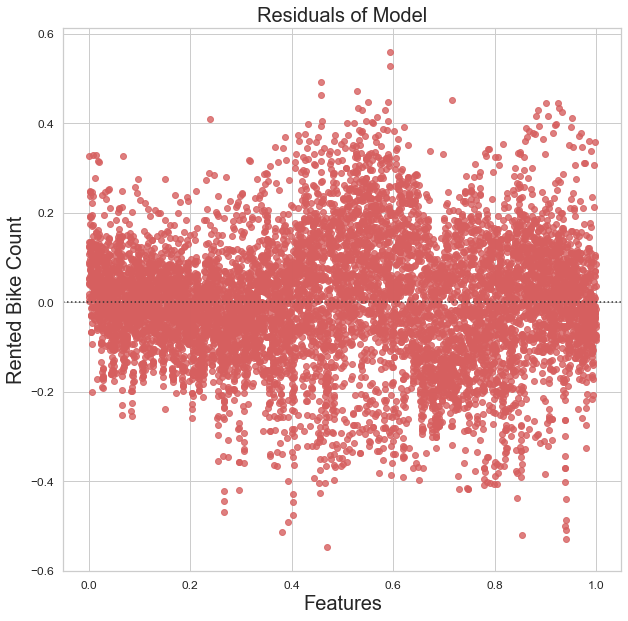

In [66]:
 # Check residuals using sns.residplot
y_hat = model.predict()
residuals = df3['bike_count'] - y_hat
x_vals = np.linspace(0, 1, len(residuals))

plt.figure(figsize=(10,10))
sns.residplot(x_vals, residuals, data = df3, color='r')
plt.title('Residuals of Model', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.ylabel('Rented Bike Count', fontsize=20)
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12)
plt.show()

In [67]:
# Checking for Feature ranking with Recursive Feature Elimination
from sklearn.feature_selection import RFE

predictors = df3.drop('bike_count', axis=1)

linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select = 10)
selector = selector.fit(predictors, df3['bike_count'])

In [68]:
print(list(zip(predictors, selector.support_)))
print(list(zip(predictors, selector.ranking_)))

[('hour', True), ('temp', True), ('humidity', True), ('visibility', False), ('solar_rad', True), ('rain', True), ('snow', False), ('season', True), ('holiday', True), ('weekend', True), ('timeshift', True), ('month', True)]
[('hour', 1), ('temp', 1), ('humidity', 1), ('visibility', 3), ('solar_rad', 1), ('rain', 1), ('snow', 2), ('season', 1), ('holiday', 1), ('weekend', 1), ('timeshift', 1), ('month', 1)]


There have been 2 features identified which are not relevant to the model - Snow and Weekend. Removing these from the model. 

In [165]:
#create a df with features from RFE
df4 = df3.drop(df3[['snow', 'weekend']], axis=1)

# Final Model

In [70]:
X4 = df4.drop('bike_count', axis=1)
y4 = df4['bike_count']

X_int = sm.add_constant(X4)
model = sm.OLS(y4,X_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             bike_count   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     1676.
Date:                Sat, 05 Nov 2022   Prob (F-statistic):               0.00
Time:                        00:13:50   Log-Likelihood:                 4802.2
No. Observations:                8465   AIC:                            -9582.
Df Residuals:                    8454   BIC:                            -9505.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2757      0.011     24.876      0.000       0.254       0.297
hour          -0.2639      0.015    -18.094      0.000      -0.293      -0.235
temp           0.5845      0.009     65.256      0.000       0.567       0.602
humidity      -0.2228      0.011    -19.470      0.000      -0.245      -0.200
visibility     0.0067      0.006      1.105      0.269      -0.005       0.019
solar_rad      0.0227      0.007      3.082      0.002       0.008       0.037
rain          -0.4282      0.012    -34.498      0.000      -0.452      -0.404
season        -0.1318      0.004    -29.755      0.000      -0.140      -0.123
holiday       -0.0554      0.007     -7.923      0.000      -0.069      -0.042
timeshift      0.4113      0.011     36.057      0.000       0.389       0.434
month          0.0264      0.005      5.374      0.000       0.017       0.036
==============================================================================
Omnibus:                       79.830   Durbin-Watson:                   0.823
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              131.002
Skew:                          -0.022   Prob(JB):                     3.58e-29
Kurtosis:                       3.608   Cond. No.                         22.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

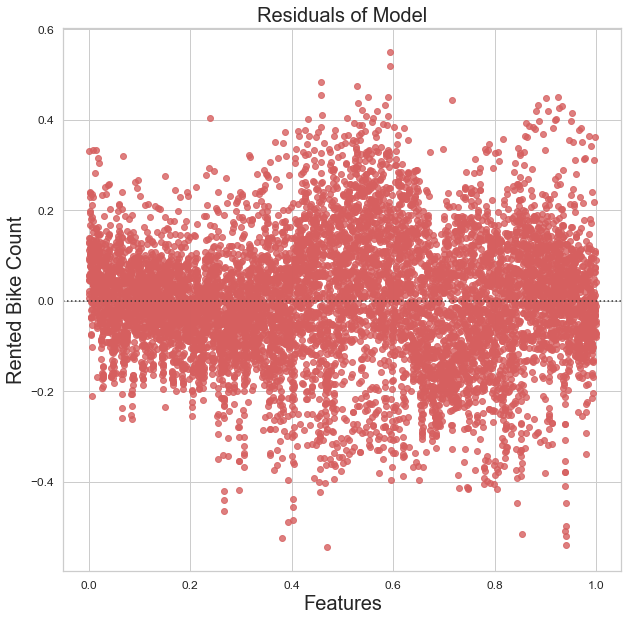

In [71]:
 # Check residuals using sns.residplot
y_hat = model.predict()
residuals = df4['bike_count'] - y_hat
x_vals = np.linspace(0, 1, len(residuals))

plt.figure(figsize=(10,10))
sns.residplot(x_vals, residuals, data = df4, color='r')
plt.title('Residuals of Model', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.ylabel('Rented Bike Count', fontsize=20)
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12)
# plt.show()

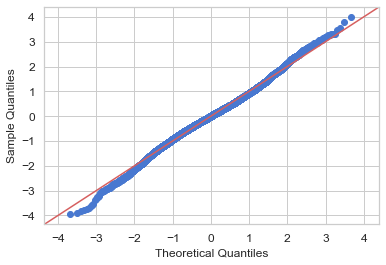

In [115]:
# QQ plot of the residuals
import scipy.stats as stats
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

# Train Test Split

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X4, y4, test_size=0.3, random_state=42)

In [143]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [142]:
#Let's check the shape of the train and test dataset

print(f'The shape of the train and test set for the independent variables are : X_train = {X_train.shape}, X_test = {X_test.shape}')
print(f'The shape of the train and test set for the dependent variables are : y_train = {y_train.shape}, y_test = {y_test.shape}')

The shape of the train and test set for the independent variables are : X_train = (5925, 10), X_test = (2540, 10)
The shape of the train and test set for the dependent variables are : y_train = (5925,), y_test = (2540,)


In [144]:
# Fit the model and apply the model to the make test set predictions
linreg.fit(X_train, y_train)
# Test set predictions 
lm_test_predictions = linreg.predict(X_test)
# Test set predictions 
lm_train_predictions = linreg.predict(X_train)

In [145]:
# Calculate residuals and mean squared error
from sklearn.metrics import mean_squared_error
test_residuals = lm_test_predictions - y_test
train_mse = mean_squared_error(y_train, lm_train_predictions)
test_mse = mean_squared_error(y_test, lm_test_predictions)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 0.019116124052624806
Test Mean Squarred Error: 0.018179521701771586


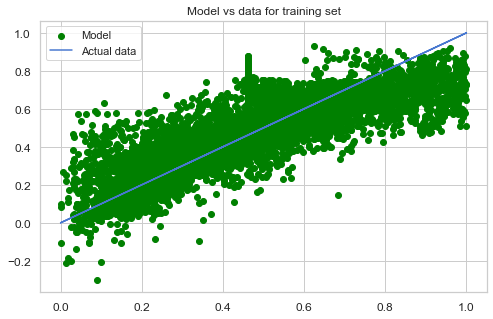

In [159]:
# Run this cell - vertical distance between the points and the line denote the errors
plt.figure(figsize=(8, 5))
plt.scatter(y_train, lm_train_predictions, label='Model', color='green')
plt.plot(y_train, y_train, label='Actual data')
plt.title('Model vs data for training set')
plt.legend();

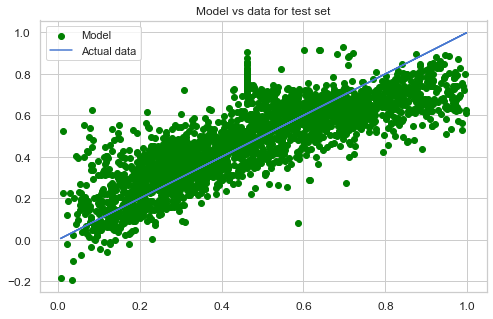

In [161]:
# Run this cell - vertical distance between the points and the line denote the errors
plt.figure(figsize=(8, 5))
plt.scatter(y_test, lm_test_predictions, label='Model', color='green')
plt.plot(y_test, y_test, label='Actual data')
plt.title('Model vs data for test set')
plt.legend();

# Calculating Bias and Variance

In [148]:
import numpy as np
def bias(y, y_hat):
    return np.mean(y_hat - y)

In [149]:
def variance(y_hat):
    return np.mean([yi**2 for yi in y_hat]) - np.mean(y_hat)**2

In [150]:
# Bias and variance for training set 
b = bias(y_train, lm_train_predictions) 
v = variance(lm_train_predictions) 
print('Train bias: {} \nTrain variance: {}'.format(b, v))

Train bias: 6.661338147750939e-17 
Train variance: 0.03727348085883683


In [151]:
# Bias and variance for test set 
b = bias(y_test, lm_test_predictions) 
v = variance(lm_test_predictions) 
print('Test bias: {} \nTest variance: {}'.format(b, v))

Test bias: 0.0007248461015678153 
Test variance: 0.036998869621247515


# Cross-Validation 

In [152]:
#Now let's compare that single test MSE to a cross-validated test MSE.
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, make_scorer


In [153]:
mse=make_scorer(mean_squared_error)

In [154]:
cv_10_results = cross_val_score(linreg, X4, y4, cv=10, scoring=mse)
cv_10_results

array([0.00962679, 0.00701819, 0.01281463, 0.01506579, 0.02898007,
       0.03724656, 0.02763119, 0.02376453, 0.02238039, 0.01602413])

In [155]:
cv_10_results.mean()

0.020055227526870816

In [156]:
from sklearn.model_selection import cross_validate
model_simple = LinearRegression()
scores_simple = cross_validate(
                    model_simple, X_train, y_train, cv=5, 
                    return_train_score=True
)
scores_simple

{'fit_time': array([0.00982094, 0.00887704, 0.00300503, 0.0023489 , 0.00233293]),
 'score_time': array([0.00182605, 0.00185299, 0.00147486, 0.00106692, 0.00073028]),
 'test_score': array([0.66357433, 0.6445503 , 0.65935434, 0.65313224, 0.67778073]),
 'train_score': array([0.66017284, 0.66491785, 0.66123183, 0.66274463, 0.65648652])}

In [157]:
# Mean train r_2
np.mean(scores_simple['train_score']), np.std(scores_simple['train_score'])

(0.6611107355103046, 0.0028086105712055)

In [158]:
# Mean test r_2
np.mean(scores_simple['test_score']), np.std(scores_simple['test_score'])

(0.6596783885068106, 0.01108773640721705)

# Conclusion

The most important feature of the model is the temperature for our Linear model. The demand is high during the hotter days.

Seasons and months have a strong impact on the demand for the bikes. Summer and Autumn months have higher demand. 
Winter is the month with the lowest demand for the bikes.

Time of the day is also important factor to consider while planning. The demand is higher during certain times of the day  during different seasons. 7am-9am and 3pm-8pm is the busiest time. 

Rainy days have a negative impact on rental bikes as we could have imagined. People dont prefer to use bikes when it’s pouring. 

Non holiday days are busier for rental bikes as compared to holidays.